# PROJET STATISTIQUE

* ## Installation et chargement des packages necessaires

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# CHARGEMENTS DES PACKAGES NECESSAIRES
import pandas as pd
from collections import Counter # va permettre de calculer les mots frequents
from wordcloud import WordCloud # va permettre de faire un nuage de mots pour faire ressortir les mots les plus frequents
import matplotlib.pyplot as plt 

* ## IMPORTATION DES DONNEES

In [3]:
data = pd.read_excel("makeorg_sport.xlsx")

##  STATISTIQUES DESCRIPTIVES

In [4]:
print(data)

                                            Proposition Nom d'auteur   Âge  \
0     Il faut sensibiliser les enfants depuis le plu...    DOMINIQUE  68.0   
1     Il faut que les communes facilitent la "marche...        Klaus  53.0   
2     Il faut dès l'école faire le lien entre la san...          Léo  46.0   
3     Il faut être très rigoureux des l'enfance sur ...        Cathy  60.0   
4     Il faut permettre à ceux ayant un handicap et ...     Bertrand   NaN   
...                                                 ...          ...   ...   
1904  Il faut adopter un chien ça fera à minima 45 m...       Esther   NaN   
1905  Il faut pouvoir exclure tout membre d’une fédé...     Caroline  57.0   
1906  Il faut réduire le nombre d'arrêt de bus en vi...        Alain  50.0   
1907  Il faut inciter les Français à s'équiper de mo...       Esther  61.0   
1908  Il faut encourager les garçons à s'inscrire da...        Cérès   NaN   

      Département Zone d'adhésion  Nb de votes  Zone score  % p

In [5]:
print(data.describe())

               Âge  Département  Nb de votes   Zone score       % pour  \
count  1516.000000   999.000000  1909.000000  1909.000000  1909.000000   
mean     50.662929    69.575576   166.039811     0.585409     0.621671   
std      13.770077   125.411204   142.210545     0.294581     0.159325   
min      12.000000     1.000000    16.000000     0.040000     0.054000   
25%      40.000000    32.000000    96.000000     0.291000     0.526000   
50%      51.000000    59.000000    97.000000     0.643000     0.646000   
75%      61.000000    76.000000   202.000000     0.822000     0.742000   
max      87.000000   974.000000  1584.000000     1.150000     0.937000   

          % contre     % neutre  
count  1909.000000  1909.000000  
mean      0.168306     0.209935  
std       0.110576     0.092298  
min       0.012000     0.020000  
25%       0.090000     0.148000  
50%       0.142000     0.194000  
75%       0.220000     0.260000  
max       0.816000     0.815000  


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909 entries, 0 to 1908
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Proposition      1909 non-null   object 
 1   Nom d'auteur     1909 non-null   object 
 2   Âge              1516 non-null   float64
 3   Département      999 non-null    float64
 4   Zone d'adhésion  1909 non-null   object 
 5   Nb de votes      1909 non-null   int64  
 6   Zone score       1909 non-null   float64
 7   % pour           1909 non-null   float64
 8   % contre         1909 non-null   float64
 9   % neutre         1909 non-null   float64
 10  Id               1909 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 164.2+ KB
None


* Nombre de mots par propositions

In [7]:
nb_mots = [len(proposition.split()) for proposition in data["Proposition"]]

# Créer un DataFrame
df = pd.Series(nb_mots)
data['nb_de_mots'] = df 
# Afficher le résultat dans un format similaire
print(data['nb_de_mots'])

0       21
1       20
2       28
3       26
4       23
        ..
1904    17
1905    19
1906    19
1907    21
1908    15
Name: nb_de_mots, Length: 1909, dtype: int64


* # Analyse des données manquantes

In [8]:
# Visualisation des données manquantes
missing_values = data.isnull().sum()
print(missing_values)


Proposition          0
Nom d'auteur         0
Âge                393
Département        910
Zone d'adhésion      0
Nb de votes          0
Zone score           0
% pour               0
% contre             0
% neutre             0
Id                   0
nb_de_mots           0
dtype: int64


In [9]:
# Proportion des données manquantes par colonne
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

Proposition         0.000000
Nom d'auteur        0.000000
Âge                20.586695
Département        47.668937
Zone d'adhésion     0.000000
Nb de votes         0.000000
Zone score          0.000000
% pour              0.000000
% contre            0.000000
% neutre            0.000000
Id                  0.000000
nb_de_mots          0.000000
dtype: float64


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

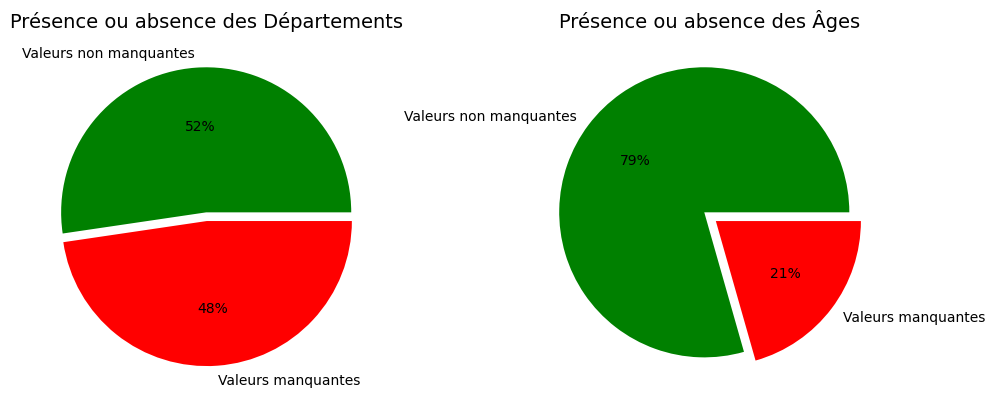

In [11]:
# Création de la figure avec deux sous-graphiques côte à côte
# Configuration des graphiques
fig, axes = plt.subplots(1, 2, figsize=(10, 12))  # 2 lignes, 1 colonne, taille personnalisée

# Données et paramètres pour le premier graphique
colors = ["green", "red"]
labels = ["Valeurs non manquantes", "Valeurs manquantes"]
explode = [0.03, 0.03]
bdd = data['Département'].notnull().value_counts()

# Premier graphique (Présence ou absence des Départements)
axes[0].pie(
    bdd, labels=labels, autopct="%0.0f%%", explode=explode,
    textprops={"color": '#000000'}, colors=colors
)
axes[0].set_title("Présence ou absence des Départements", fontsize=14)

# Données et paramètres pour le deuxième graphique
explode = [0.05, 0.05]
bdd1 = data['Âge'].notnull().value_counts()

# Deuxième graphique (Présence ou absence des Âges)
axes[1].pie(
    bdd1, labels=labels, autopct="%0.0f%%", explode=explode,
    textprops={"color": '#000000'}, colors=colors
)
axes[1].set_title("Présence ou absence des Âges", fontsize=14)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


* ## VISUALISATION GRAPHIQUE DES DONNEES

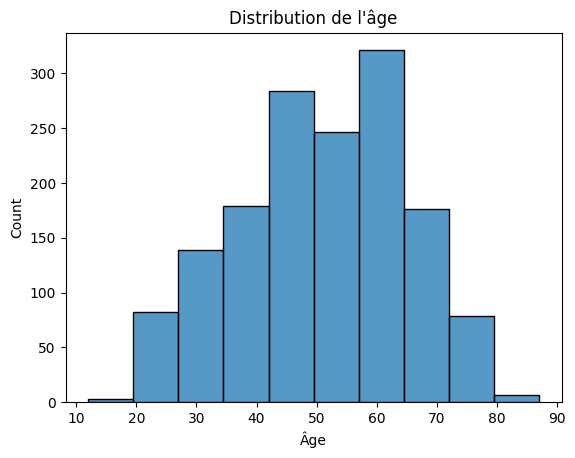

In [12]:

sns.histplot(data=data, x='Âge', bins=10, kde=False)
plt.title('Distribution de l\'âge')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_19312\1421094456.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.cut(data['Âge'], bins=bins, labels=labels, include_lowest=False), palette='viridis', stat = 'proportion')


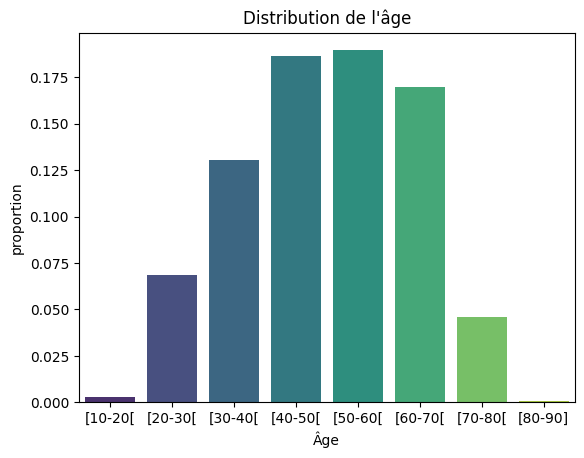

In [13]:
bins = [10,20,30,40,50,60,70,80,90]  # Limites des intervalles
labels = ['[10-20[', '[20-30[', '[30-40[', '[40-50[', '[50-60[', '[60-70[', '[70-80[','[80-90]']

# Utiliser pd.cut directement dans le graphique
sns.countplot(x=pd.cut(data['Âge'], bins=bins, labels=labels, include_lowest=False), palette='viridis', stat = 'proportion')
plt.title('Distribution de l\'âge')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_19312\2635192561.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Catégories"] = pd.cut(df_filtered["Âge révolu"], bins=bins, labels=labels, include_lowest=False)
C:\Users\USER\AppData\Local\Temp\ipykernel_19312\2635192561.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


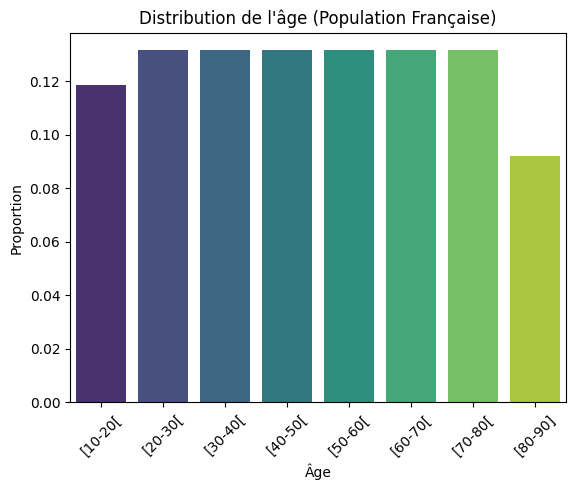

In [49]:

data = pd.ExcelFile("Pyra2024.xlsx")
df_france = data.parse("2024 - France")
df_france.head()
df_clean = data.parse("2024 - France", skiprows=4)
df_clean.columns = ["Année de naissance", "Âge révolu", "Nombre d'hommes", "Nombre de femmes", "Ensemble"]
df_clean = df_clean.dropna(subset=["Âge révolu", "Ensemble"])
df_clean.head()
df_clean = df_clean[df_clean["Âge révolu"] != "Âge révolu"] 
df_clean["Âge révolu"] = pd.to_numeric(df_clean["Âge révolu"], errors='coerce')
df_clean["Ensemble"] = pd.to_numeric(df_clean["Ensemble"], errors='coerce')
df_clean = df_clean.dropna()
# Filtrer la population française sur la plage 12-87 ans
df_filtered = df_clean[(df_clean["Âge révolu"] >= 12) & (df_clean["Âge révolu"] <= 87)]

# Calculer les effectifs pour chaque âge
ages_french_population = df_filtered["Âge révolu"]
counts_french_population = df_filtered["Ensemble"]

# Définir les intervalles et les labels
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['[10-20[', '[20-30[', '[30-40[', '[40-50[', '[50-60[', '[60-70[', '[70-80[', '[80-90]']

# Ajouter une colonne de catégories d'âge
df_filtered["Catégories"] = pd.cut(df_filtered["Âge révolu"], bins=bins, labels=labels, include_lowest=False)

# Tracer le graphique de proportion
sns.countplot(
    x=df_filtered["Catégories"],
    palette='viridis',
    order=labels,
    stat='proportion'
)
plt.title("Distribution de l'âge (Population Française)")
plt.xlabel("Âge")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.show()


In [50]:
from scipy.stats import chisquare
df_filtered["Catégories"] = pd.cut(df_filtered["Âge révolu"], bins=bins, labels=labels, include_lowest=False)
france_counts = df_filtered["Catégories"].value_counts()
france_proportions = france_counts / france_counts.sum()  # Proportions normalisées

# Échantillon : calcul des proportions pour chaque catégorie
sample_counts = pd.cut(sample_ages, bins=bins, labels=labels, include_lowest=False).value_counts()
sample_proportions = sample_counts / sample_counts.sum()  # Proportions normalisées

# Test du chi²
chi2_stat, p_value = chisquare(f_obs=sample_proportions, f_exp=france_proportions)

# Résultats
chi2_stat, p_value


C:\Users\USER\AppData\Local\Temp\ipykernel_19312\1410150740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Catégories"] = pd.cut(df_filtered["Âge révolu"], bins=bins, labels=labels, include_lowest=False)


(0.5436049986309928, 0.999270636401612)

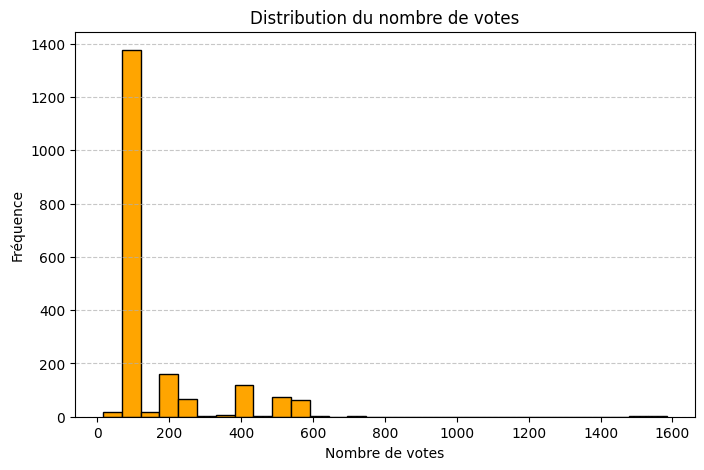

In [28]:

values = data['Nb de votes'].dropna()  
counts, bin_edges = np.histogram(values, bins=30)
plt.figure(figsize=(8, 5))
plt.bar(bin_edges[:-1], counts, width=np.diff(bin_edges), edgecolor='black', align='edge', color='orange')
plt.title("Distribution du nombre de votes")
plt.xlabel("Nombre de votes")
plt.ylabel("Fréquence")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

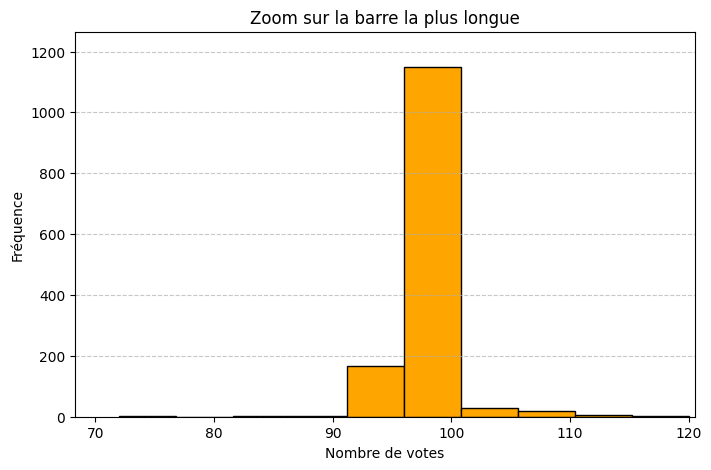

In [30]:


# Identifier l'index de la barre la plus longue
max_count_index = np.argmax(counts)
max_bin_start = bin_edges[max_count_index]
max_bin_end = bin_edges[max_count_index + 1]
filtered_values = values[(values >= max_bin_start) & (values < max_bin_end)]

# Recalculer un histogramme avec des bins plus fins sur cette plage
fine_bins = 10  
fine_counts, fine_bin_edges = np.histogram(filtered_values, bins=fine_bins)

plt.figure(figsize=(8, 5))
plt.bar(fine_bin_edges[:-1], fine_counts, width=np.diff(fine_bin_edges), edgecolor='black', align='edge', color='orange')
plt.xlim(max_bin_start, max_bin_end)  
plt.ylim(0, fine_counts.max() * 1.1)  
plt.title("Zoom sur la barre la plus longue")
plt.xlabel("Nombre de votes")
plt.ylabel("Fréquence")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


* ## Analyse des votes

C:\Users\USER\AppData\Local\Temp\ipykernel_19312\3952027556.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = pd.cut(data['nb_de_mots'],bins = bins, labels = labels,include_lowest = True),palette = 'viridis',stat='proportion')


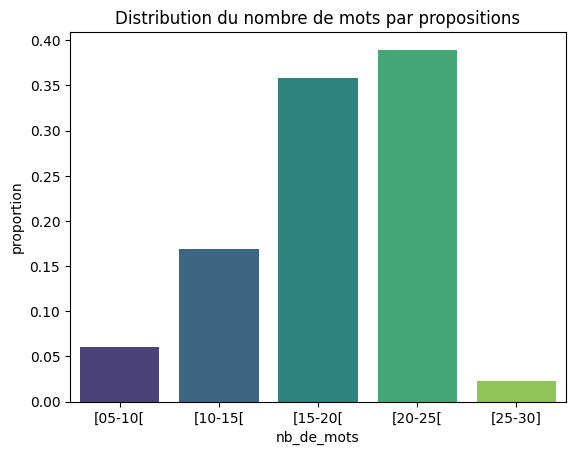

In [15]:
bins = [5,10,15,20,25,30]  # Limites des intervalles
labels = ['[05-10[','[10-15[', '[15-20[', '[20-25[','[25-30]']

sns.countplot(x = pd.cut(data['nb_de_mots'],bins = bins, labels = labels,include_lowest = True),palette = 'viridis',stat='proportion')
plt.title('Distribution du nombre de mots par propositions')
plt.show()

* ## Distribution du nombre de vote

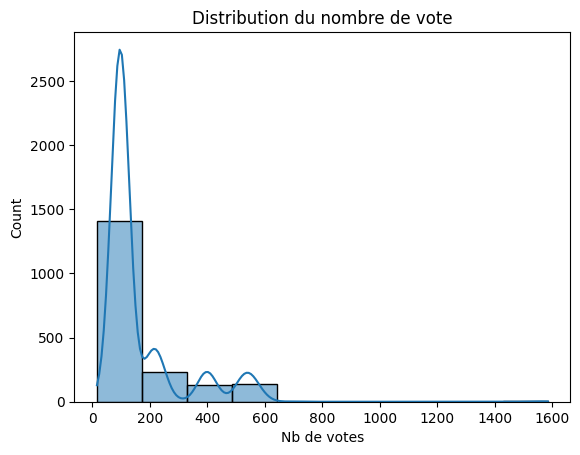

In [16]:
sns.histplot(data=data, x='Nb de votes', bins=10, kde=True)
plt.title('Distribution du nombre de vote')
plt.show()

* ## Distribution moyenne des types de vote

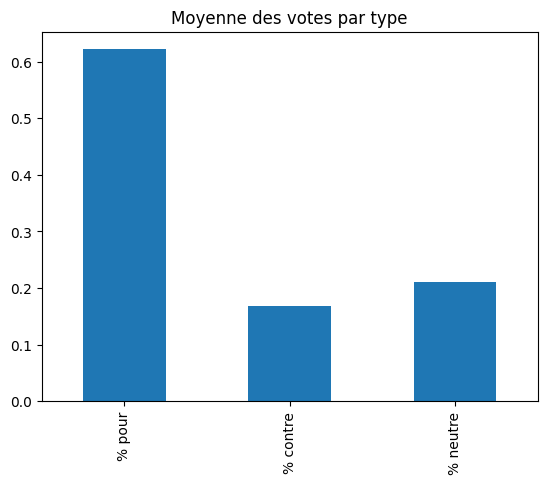

In [17]:
mean_votes = data[['% pour', '% contre', '% neutre']].mean()
mean_votes.plot(kind='bar', title='Moyenne des votes par type')
plt.show()

% pour      0.625928
% contre    0.167843
% neutre    0.206151
dtype: float64


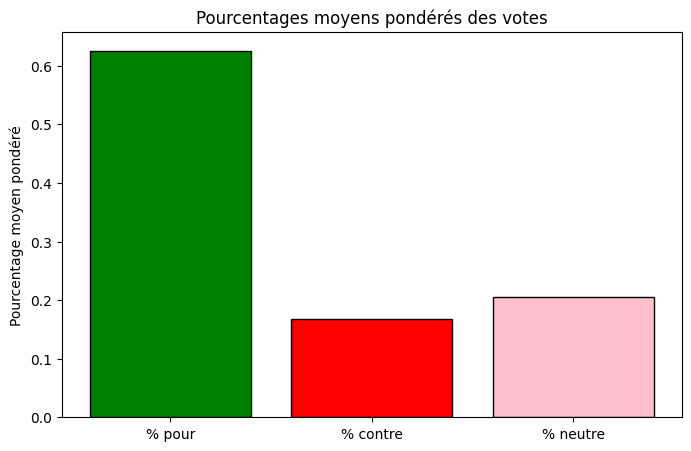

In [27]:
# Calculer les pourcentages moyens pondérés
weighted_means = {
    '% pour': (data['% pour'] * data['Nb de votes']).sum() / data['Nb de votes'].sum(),
    '% contre': (data['% contre'] * data['Nb de votes']).sum() / data['Nb de votes'].sum(),
    '% neutre': (data['% neutre'] * data['Nb de votes']).sum() / data['Nb de votes'].sum()
}

# Créer un DataFrame pour afficher les valeurs
weighted_means_df = pd.Series(weighted_means)

print(weighted_means_df)
# Tracer le diagramme en barres des pourcentages moyens pondérés
plt.figure(figsize=(8, 5))
plt.bar(weighted_means_df.index, weighted_means_df.values, edgecolor='black', color=['green', 'red', 'pink'])
plt.title("Pourcentages moyens pondérés des votes")
plt.ylabel("Pourcentage moyen pondéré")
plt.show()

* ## Categorisation des propositions

In [19]:
# Fonction pour déterminer la catégorie dominante
def get_dominant_category(row):
    if row['% pour normalisé'] > row['% contre normalisé'] and row['% pour normalisé'] > row['% neutre normalisé']:
        return 'pour'
    elif row['% contre normalisé'] > row['% pour normalisé'] and row['% contre normalisé'] > row['% neutre normalisé']:
        return 'contre'
    else:
        return 'neutre'

# Ajouter une nouvelle colonne
data['Catégorie'] = data.apply(get_dominant_category, axis=1)

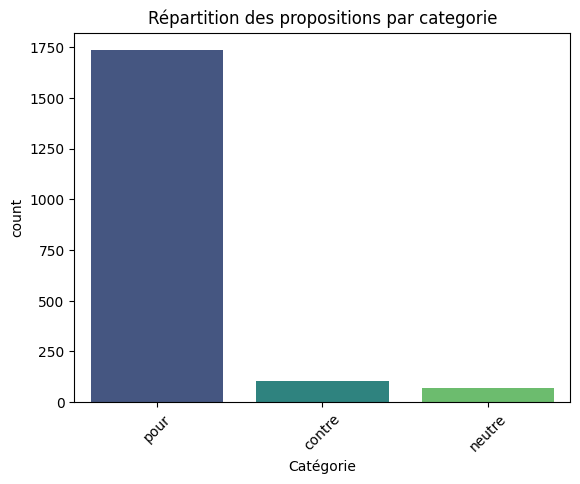

In [20]:
sns.countplot(data=data, x='Catégorie', palette='viridis', hue = "Catégorie")
plt.title('Répartition des propositions par categorie')
plt.xticks(rotation=45)
plt.show()

* ## Distribution des zones d'adhésion

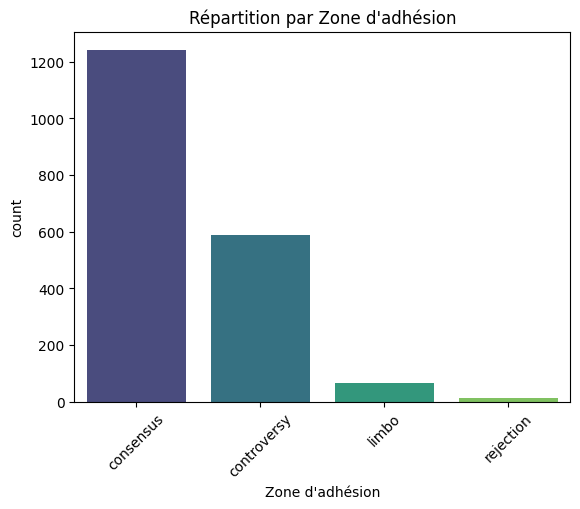

In [21]:
sns.countplot(data=data, x='Zone d\'adhésion', palette='viridis', hue="Zone d\'adhésion")
plt.title('Répartition par Zone d\'adhésion')
plt.xticks(rotation=45)
plt.show()

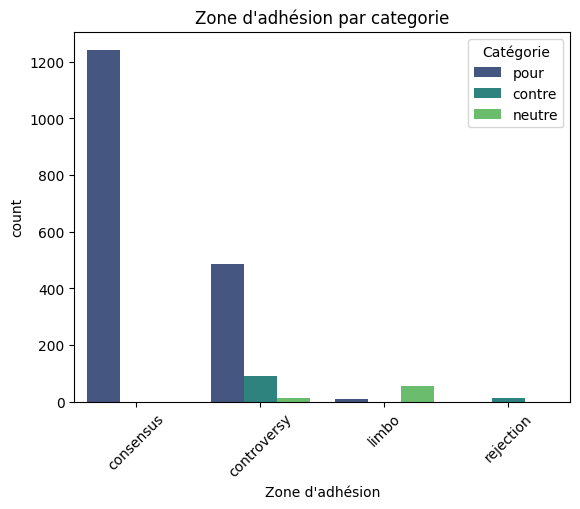

In [22]:
sns.countplot(data=data, x='Zone d\'adhésion', palette='viridis', hue="Catégorie")
plt.title('Zone d\'adhésion par categorie')
plt.xticks(rotation=45)
plt.show()

* # Analyse des mots les plus fréquents dans les propositions (sans nettoyage initial).

In [23]:
from collections import Counter

# Compter les mots 
word_counts = Counter(" ".join(data['Proposition']).split())
print(word_counts.most_common(10)) 


[('Il', 1911), ('faut', 1907), ('les', 1554), ('de', 1440), ('des', 1052), ('et', 927), ('pour', 736), ('à', 727), ('le', 717), ('la', 688)]


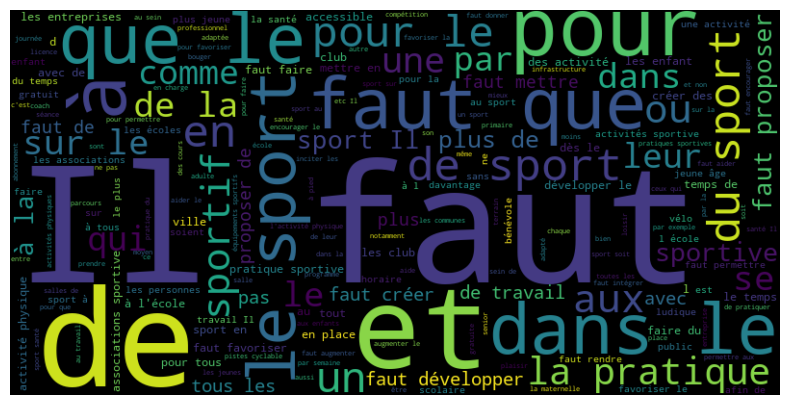

In [24]:
# Générer un nuage de mots à partir des propositions pour visualiser les mots les plus fréquents
# On fusionne toutes les propositions en une seule chaîne de caractères
text = " ".join(data['Proposition']) #
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation="bilinear") # Pour afficher l'image avec une interpolation fluide
plt.axis("off") # Désactive les axes pour un affichage propre
plt.show()

* # Prétraitement des données textuelles

In [25]:
import unicodedata

def remove_accents(text):
    # Normalise le texte en supprimant les accents
    text = unicodedata.normalize('NFKD', text)
    text = ''.join(char for char in text if not unicodedata.combining(char))
    return text


In [26]:
import spacy
nlp = spacy.load("fr_core_news_sm") 
def preprocess_with_spacy(text):
    # Analyser le texte avec spaCy
    doc = nlp(text.lower())  # Mise en minuscule
    cleaned_tokens = []
    mots_inutils = ['faire','falloir','comme','tous','sport','sportif','etre']
    for token in doc:
        if not token.is_stop and token.is_alpha and token.lemma_ not in mots_inutils:  # Exclure stopwords et non-alphabetiques
            cleaned_tokens.append(remove_accents(token.lemma_))  # Ajouter la forme lemmatisée du mot

    return " ".join(cleaned_tokens)
# Nettoyer les propositions
data['cleaned_propositions'] = data['Proposition'].apply(preprocess_with_spacy)

ModuleNotFoundError: No module named 'spacy'

In [28]:
print(data['cleaned_propositions'])

0       sensibiliser enfant jeune age ecole maternel p...
1       commune faciliter marche ville amenager itiner...
2       ecole lien sante demontrer jeune meilleur moye...
3       rigoureux enfance etat esprit bienveillant dro...
4       permettre handicap souhaiter rencontrer struct...
                              ...                        
1904        adopter chien minimum minute marche fois jour
1905    pouvoir exclure membre federation resultat evi...
1906      reduire nombre arret bus ville obliger marche m
1907    inciter francais equiper montre connecter stim...
1908       encourager garcon inscrire club football rugby
Name: cleaned_propositions, Length: 1909, dtype: object


* ## Statistique descriptive des prpositions nettoyées

In [29]:
nb_mots = [len(proposition.split()) for proposition in data["cleaned_propositions"]]

# Créer un DataFrame
df = pd.Series(nb_mots)
# Afficher le résultat dans un format similaire
print(df.describe())

count    1909.000000
mean        7.778418
std         2.297715
min         1.000000
25%         6.000000
50%         8.000000
75%         9.000000
max        14.000000
dtype: float64


* ## Les mots les plus frequents

In [30]:
# Compter les mots 
word_counts = Counter(" ".join(data['cleaned_propositions']).split())
print(word_counts.most_common(20)) 

[('activite', 295), ('pratique', 241), ('ecole', 211), ('physique', 165), ('temps', 159), ('club', 156), ('proposer', 148), ('enfant', 142), ('sante', 127), ('travail', 126), ('entreprise', 122), ('developper', 113), ('favoriser', 109), ('association', 107), ('mettre', 105), ('creer', 102), ('jeune', 96), ('permettre', 96), ('pouvoir', 94), ('age', 91)]


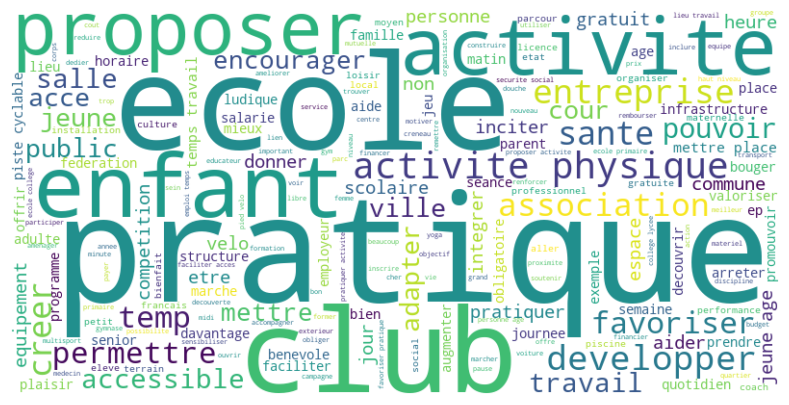

In [31]:
text = " ".join(data['cleaned_propositions']) 
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") # Désactive les axes pour un affichage propre
plt.show()

* # Modélisation des thématiques avec Word2Vec

In [32]:
# pip install --upgrade scipy gensim
# pip install gensim

In [33]:
from gensim.models import Word2Vec # Bibliothèque pour entraîner des modèles Word2Vec

In [34]:
# Tokenisation des phrases
tokenized_sentences = [text.split() for text in data['cleaned_propositions']]

# Entraîner le modèle Word2Vec
# vector_size : taille des vecteurs (100 dimensions)
# window : nombre de mots voisins considérés
# min_count : ignorer les mots qui apparaissent moins de 2 fois
# workers : nombre de cœurs utilisés pour le traitement
model = Word2Vec(sentences=tokenized_sentences, vector_size=200, window=14,sg=1,  min_count=3, workers=9)

# Exemples de mots similaires
print(model.wv.most_similar("club"))


[('travers', 0.9990177154541016), ('licence', 0.9989945292472839), ('e', 0.9989886283874512), ('cher', 0.998979389667511), ('lien', 0.9989697337150574), ('accompagner', 0.9989659786224365), ('an', 0.9989656805992126), ('cotisation', 0.998963475227356), ('association', 0.9989625811576843), ('soir', 0.9989582300186157)]


* # Entraîner Skip-Gram (sg=1) ou CBOW (sg=0)

In [35]:
# Entraîner Skip-Gram (sg=1) ou CBOW (sg=0)
skip_gram_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, sg=1, min_count=2)
cbow_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, sg=0, min_count=2)


* # Analyse des thématiques

In [36]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler

* ## Analyse des mots

In [37]:
# Récupérer les mots et leurs vecteurs
words = list(model.wv.index_to_key)  # Tous les mots du vocabulaire
vectors = model.wv[words]  # Les vecteurs correspondants
print(words)
print(vectors)

['activite', 'pratique', 'ecole', 'physique', 'temps', 'club', 'proposer', 'enfant', 'sante', 'travail', 'entreprise', 'developper', 'favoriser', 'association', 'mettre', 'creer', 'permettre', 'jeune', 'pouvoir', 'age', 'acces', 'personne', 'pratiquer', 'velo', 'place', 'public', 'salle', 'adapter', 'cours', 'accessible', 'heure', 'ville', 'donner', 'scolaire', 'aider', 'encourager', 'non', 'social', 'inciter', 'equipement', 'gratuit', 'lieu', 'integrer', 'competition', 'espace', 'faciliter', 'etre', 'primaire', 'jeu', 'semaine', 'prendre', 'college', 'commune', 'jour', 'horaire', 'augmenter', 'bien', 'niveau', 'benevole', 'infrastructure', 'promouvoir', 'quotidien', 'adulte', 'aide', 'cyclable', 'pied', 'journee', 'ludique', 'davantage', 'seance', 'offrir', 'salarie', 'structure', 'ep', 'securite', 'senior', 'parent', 'prix', 'mieux', 'plaisir', 'moyen', 'nombre', 'grand', 'licence', 'exemple', 'charge', 'bouger', 'bienfait', 'piste', 'marche', 'obligatoire', 'organiser', 'federation'

In [38]:

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(vectors)
# Réduction des vecteurs à 2 dimensions (ACP)
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(vectors_normalized)


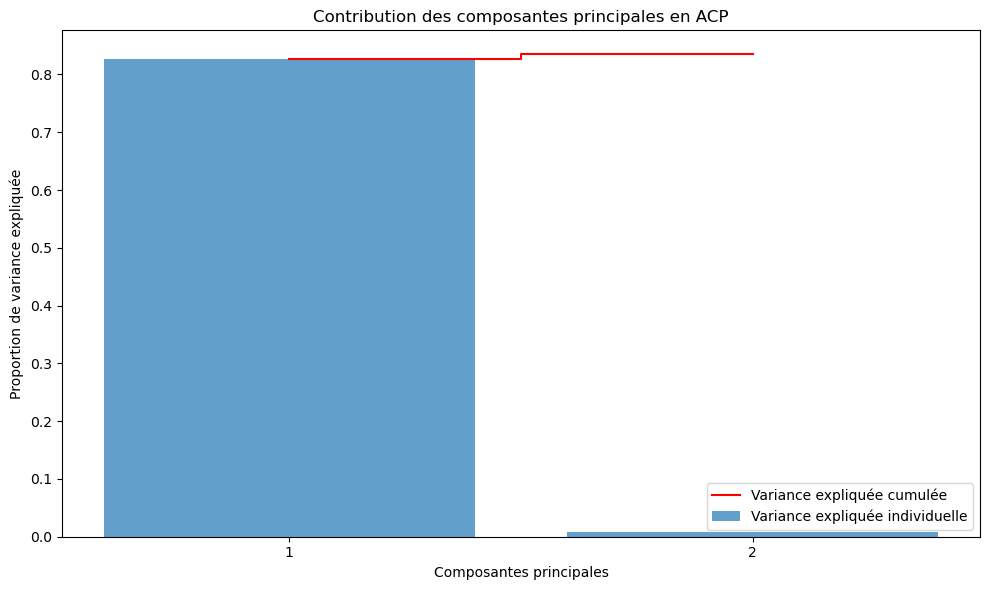

In [39]:
# Variance expliquée par chaque composante principale
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_cumsum = np.cumsum(explained_variance_ratio)

# Afficher les résultats
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center',
        label='Variance expliquée individuelle')
plt.step(range(1, len(explained_variance_ratio) + 1), explained_variance_cumsum, where='mid',
         label='Variance expliquée cumulée', color='red')
plt.xlabel('Composantes principales')
plt.ylabel('Proportion de variance expliquée')
plt.title('Contribution des composantes principales en ACP')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [40]:
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Composante {i+1}: Variance expliquée = {ratio:.2%}")

print(f"Variance expliquée cumulée (2 premières composantes) : {explained_variance_cumsum[1]:.2%}")

Composante 1: Variance expliquée = 82.62%
Composante 2: Variance expliquée = 0.84%
Variance expliquée cumulée (2 premières composantes) : 83.46%


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(vectors)

# Réduction des vecteurs à 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
word_vectors_2d = tsne.fit_transform(vectors_normalized)

# Appliquer le clustering K-Means
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(word_vectors_2d)

# Préparer les données pour le graphique
df = pd.DataFrame(word_vectors_2d, columns=['Dim1', 'Dim2'])
df['word'] = words  # Ajouter les mots correspondants
df['cluster'] = clusters  # Ajouter les labels des clusters

# Afficher un aperçu des données
print(df.head())


        Dim1      Dim2      word  cluster
0 -45.935883 -6.520440  activite        2
1 -48.390701 -5.392727  pratique        2
2 -44.112129 -9.366257     ecole        2
3 -40.816540  5.373504  physique        2
4 -33.175327 -6.934630     temps        5


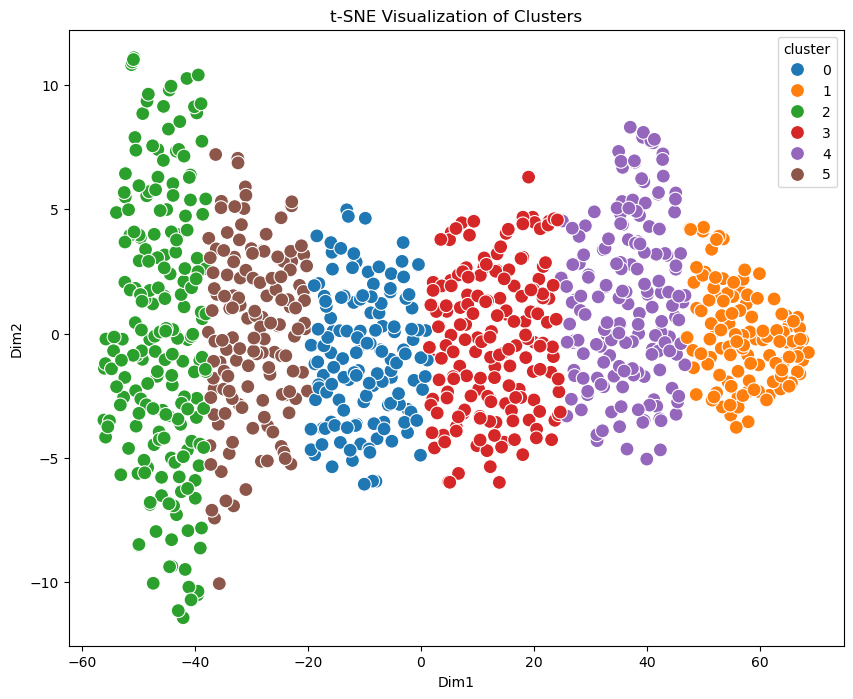

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Dim1', y='Dim2', hue='cluster', data=df, palette='tab10', s=100
)
plt.title('t-SNE Visualization of Clusters')
plt.show()


In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd
import plotly.express as px

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(vectors)

# Réduction des vecteurs à 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
word_vectors_2d = tsne.fit_transform(vectors_normalized)

# Appliquer le clustering K-Means
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(word_vectors_2d)

# Préparer les données pour le graphique
df = pd.DataFrame(word_vectors_2d, columns=['Dim1', 'Dim2'])  # Dimensions réduites avec t-SNE
df['word'] = words  # Ajouter les mots correspondants
df['cluster'] = clusters  # Ajouter les labels des clusters

# Créer le graphique interactif
fig = px.scatter(
    df,
    x='Dim1',
    y='Dim2',
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='word',  # Afficher le mot lors du survol
    title="Projection des vecteurs de mots (t-SNE avec Clustering K-Means)",
    labels={'Dim1': 'Dimension 1', 'Dim2': 'Dimension 2'},
    color_continuous_scale='Viridis',  # Choisir une palette de couleurs
    category_orders={"cluster": [str(i) for i in range(n_clusters)]},  # Assurez-vous que les clusters sont dans un ordre compréhensible
    width=1000,
    height=600
)

# Personnaliser les points
fig.update_traces(marker=dict(size=10, opacity=0.8, line=dict(width=2, color='DarkSlateGrey')))

# Ajouter un titre pour la légende des clusters
fig.update_layout(
    legend_title="Clusters",
    title_x=0.5,  # Centrer le titre
)

# Afficher le graphique
fig.show()


In [44]:

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(vectors)

# Réduction des vecteurs à 2 dimensions (ACP)
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(vectors_normalized)

# Appliquer le clustering K-Means
n_clusters = 6  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(word_vectors_2d)

# Préparer les données pour le graphique
df = pd.DataFrame(word_vectors_2d, columns=['PC1', 'PC2'])
df['word'] = words  # Ajouter les mots correspondants
df['cluster'] = kmeans.labels_  # Ajouter les labels des clusters

# Créer le graphique interactif
fig = px.scatter(
    df, 
    x='PC1', 
    y='PC2',
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='word',  # Afficher le mot lors du survol
    title="Projection des vecteurs de mots (ACP avec Clustering K-Means)",
    labels={'PC1': 'Composante principale 1', 'PC2': 'Composante principale 2'},
    color_continuous_scale='Viridis',  # Choisir une palette de couleurs
    category_orders={"cluster": [str(i) for i in range(n_clusters)]},  # Assurez-vous que les clusters sont dans un ordre compréhensible
    width = 1000,
    height = 600
)

# Personnaliser les points
fig.update_traces(marker=dict(size=10, opacity=0.8, line=dict(width=2, color='DarkSlateGrey')))

# Ajouter un titre pour la légende des clusters
fig.update_layout(
    legend_title="Clusters",
    title_x=0.5,  # Centrer le titre
)

# Afficher le graphique
fig.show()


* ## Analyse des propositions

In [45]:
# Fonction pour calculer le vecteur moyen d'une proposition

def get_mean_vector(sentence, model):
    words = sentence.split()  # Tokenisation simple
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if word_vectors:  # Si des mots de la proposition sont dans le modèle
        return np.mean(word_vectors, axis=0)
    else:  # Si aucun mot de la proposition n'est dans le modèle
        return np.zeros(model.vector_size)


In [46]:
# Calculer un vecteur moyen pour chaque proposition

data['mean_vector'] = data.apply(
    lambda row: get_mean_vector(row['cleaned_propositions'], model),
    axis=1
)
print(data['mean_vector'])


0       [-0.0093266945, -0.02798988, -0.0017915044, 0....
1       [-0.0074899853, -0.027284151, -0.00208488, 0.0...
2       [-0.0069954377, -0.025525035, -0.003024181, 0....
3       [-0.0066323057, -0.024649674, -0.0019361881, 0...
4       [-0.005237499, -0.025137132, -0.0038713322, 0....
                              ...                        
1904    [-0.006746547, -0.025628824, 4.3669716e-06, 0....
1905    [-0.0057715313, -0.022057904, -0.002138088, 0....
1906    [-0.00742378, -0.025026478, 0.0001367792, 0.06...
1907    [-0.007927573, -0.026590152, -0.0013294417, 0....
1908    [-0.004574052, -0.020009978, -0.0014245668, 0....
Name: mean_vector, Length: 1909, dtype: object


In [47]:
# Convertir les vecteurs en liste pour compatibilité avec kmeans
proposition_vectors = np.vstack(data['mean_vector'].values)
len(proposition_vectors)

1909

In [48]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(proposition_vectors)

# Réduction des vecteurs à 2 dimensions (ACP)
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(vectors_normalized)

# Appliquer le clustering K-Means
n_clusters = 10  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster = kmeans.fit_predict(vectors_normalized)
data['cluster'] = cluster

# Préparer les données pour le graphique
df1 = pd.DataFrame(word_vectors_2d, columns=['PC1', 'PC2'])
df1['propositions'] = data['Proposition']  # Ajouter les propositions correspondantes
df1['cluster'] = cluster
df1['cluster'] = kmeans.labels_  # Ajouter les labels des clusters
df1['vote'] = data['Catégorie']
df1['proposition_vectors'] = data['mean_vector']
# Créer le graphique interactif
fig = px.scatter(
    df1, 
    x='PC1', 
    y='PC2',
    symbol = 'vote',
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='propositions',  # Afficher le mot lors du survol
    title="Projection des vecteurs de mots (ACP avec Clustering K-Means)",
    labels={'PC1': 'Composante principale 1', 'PC2': 'Composante principale 2','vote':'Avis des citoyens'},
    color_continuous_scale='Viridis',  # Choisir une palette de couleurs
    category_orders={"cluster": [str(i) for i in range(n_clusters)]},
    width = 1000,
    height = 600
)

# Personnaliser les points
fig.update_traces(marker=dict(size=10, opacity=0.8, line=dict(width=2, color='DarkSlateGrey')))

# Ajouter un titre pour la légende des clusters
fig.update_layout(
    title_x=0.3  # Centrer le titre
)


# Afficher le graphique
fig.show()

#df1.to_csv("D:/Gbaki 2A/Projet statistique/propositions_clusters.csv", index=False)


In [49]:
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt  # Pour obtenir la palette 'tab10'

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(proposition_vectors)

# Réduction des vecteurs à 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
word_vectors_2d = tsne.fit_transform(vectors_normalized)

# Appliquer le clustering K-Means
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster = kmeans.fit_predict(word_vectors_2d)
data['cluster'] = cluster

# Préparer les données pour le graphique
df1 = pd.DataFrame(word_vectors_2d, columns=['Dim1', 'Dim2'])
df1['propositions'] = data['Proposition']
df1['cluster'] = cluster
df1['vote'] = data['Catégorie']
df1['proposition_vectors'] = data['mean_vector']

# Récupérer les couleurs de la palette 'tab10'
tab10_colors = [plt.cm.tab10(i) for i in range(n_clusters)]
tab10_colors_hex = [f'rgb({int(r*255)}, {int(g*255)}, {int(b*255)})' for r, g, b, _ in tab10_colors]

# Créer le graphique interactif avec Plotly
fig = px.scatter(
    df1,
    x='Dim1',
    y='Dim2',
    symbol='vote',  # Utiliser la colonne 'vote' pour les symboles
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='propositions',  # Afficher les propositions lors du survol
    title="Projection des propositions (t-SNE avec Clustering K-Means)",
    labels={'Dim1': 'Dimension 1', 'Dim2': 'Dimension 2', 'vote': 'Avis des citoyens'},
    color_discrete_sequence=tab10_colors_hex,  # Utiliser la palette tab10 comme séquence discrète
    category_orders={"cluster": [str(i) for i in range(n_clusters)]},
    width=1000,
    height=600
)

# Personnaliser les points (taille et apparence)
fig.update_traces(marker=dict(size=12, opacity=0.8, line=dict(width=2, color='DarkSlateGrey')))

# Ajouter un titre pour la légende des clusters
fig.update_layout(
    legend_title="Clusters",
    title_x=0.3  # Centrer le titre
)

# Afficher le graphique
fig.show()


#df1.to_csv("D:/Gbaki 2A/Projet statistique/propositions_clusters.csv", index=False)


In [50]:
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt  # Pour la palette 'tab10'

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(proposition_vectors)

# Réduction des vecteurs à 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
word_vectors_2d = tsne.fit_transform(vectors_normalized)

# Appliquer le clustering K-Means
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster = kmeans.fit_predict(word_vectors_2d)
data['cluster'] = cluster

# Préparer les données pour le graphique
df1 = pd.DataFrame(word_vectors_2d, columns=['Dim1', 'Dim2'])
df1['propositions'] = data['Proposition']
df1['cluster'] = cluster
df1['vote'] = data['Catégorie']
df1['proposition_vectors'] = data['mean_vector']

# Récupérer la palette 'tab10' et convertir les couleurs
tab10_colors = [plt.cm.tab10(i) for i in range(n_clusters)]
tab10_colors_hex = [f'rgb({int(r*255)}, {int(g*255)}, {int(b*255)})' for r, g, b, _ in tab10_colors]

# Créer le nuage de points avec Plotly
fig = px.scatter(
    df1,
    x='Dim1',
    y='Dim2',
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='propositions',  # Afficher les propositions lors du survol
    title="Projection des propositions (t-SNE avec Clustering K-Means)",
    labels={'Dim1': 'Dimension 1', 'Dim2': 'Dimension 2'},
    color_discrete_sequence=tab10_colors_hex,  # Utiliser la palette 'tab10'
    width=1000,
    height=800
)

# Personnaliser les points (taille et style)
fig.update_traces(
    marker=dict(size=10, opacity=0.8)  # Taille uniforme similaire à s=100 dans Seaborn
)

# Ajuster le titre et les marges
fig.update_layout(
    legend_title="Clusters",
    title_x=0.5,  # Centrer le titre
    margin=dict(l=40, r=40, t=40, b=40)  # Réduire les marges
)

# Afficher le graphique
fig.show()


In [55]:
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt  # Pour obtenir la palette 'tab10'

# Normalisation des vecteurs
scaler = StandardScaler()
vectors_normalized = scaler.fit_transform(proposition_vectors)

# Réduction des vecteurs à 2 dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
word_vectors_2d = tsne.fit_transform(vectors_normalized)

# Appliquer le clustering K-Means
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster = kmeans.fit_predict(word_vectors_2d)
data['cluster'] = cluster

# Préparer les données pour le graphique
df1 = pd.DataFrame(word_vectors_2d, columns=['Dim1', 'Dim2'])
df1['propositions'] = data['Proposition']
df1['cluster'] = cluster
df1['vote'] = data['Catégorie']
df1['proposition_vectors'] = data['mean_vector']

# Récupérer les couleurs de la palette 'tab10'
tab10_colors = [plt.cm.tab10(i) for i in range(n_clusters)]
tab10_colors_hex = [f'rgb({int(r*255)}, {int(g*255)}, {int(b*255)})' for r, g, b, _ in tab10_colors]

# Créer le graphique interactif avec Plotly
fig = px.scatter(
    df1,
    x='Dim1',
    y='Dim2',
    symbol='vote',  # Utiliser la colonne 'vote' pour les symboles
    color='cluster',  # Utiliser les clusters pour la coloration
    hover_name='propositions',  # Afficher les propositions lors du survol
    title="Projection des propositions (t-SNE avec Clustering K-Means)",
    labels={'Dim1': 'Dimension 1', 'Dim2': 'Dimension 2', 'vote': 'Avis des citoyens'},
    color_discrete_sequence=tab10_colors_hex,  # Utiliser la palette tab10 comme séquence discrète
    category_orders={"cluster": [str(i) for i in range(n_clusters)]},
    width=1000,
    height=600
)

# Personnaliser les points : ajouter des bordures
fig.update_traces(marker=dict(
    size=12,  # Taille des points
    opacity=0.8,  # Transparence
    line=dict(width=1, color='white')  # Bordure noire avec une épaisseur de 2
))

# Ajouter un titre pour la légende des clusters
fig.update_layout(
    legend_title="Clusters",
    title_x=0.3,  # Centrer le titre
    margin=dict(l=40, r=40, t=40, b=40)
)

# Afficher le graphique
fig.show()
